<h1>Лабораторна робота №7 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [2]:
import zipfile
import os

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [5]:

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
main_dir="10_food_classes_all_data"

food_list = os.listdir("10_food_classes_all_data/train")
food_list.sort()
print(food_list)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [6]:
# У директоріїї лишилися лише класи hamburger, pizza, ice_cream

food_list = os.listdir("10_food_classes_all_data/train")
print(food_list, " - train")
food_list_2 = os.listdir("10_food_classes_all_data/test")
print(food_list_2, " - test")

['hamburger', 'ice_cream', 'pizza']  - train
['hamburger', 'ice_cream', 'pizza']  - test


In [7]:
tf.random.set_seed(42)
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.



Epoch 1/10



71/71 [==============================] - 23s 309ms/step - loss: 1.0458 - accuracy: 0.4711 - val_loss: 0.9772 - val_accuracy: 0.5093
Epoch 2/10
71/71 [==============================] - 22s 303ms/step - loss: 0.9035 - accuracy: 0.5871 - val_loss: 0.8689 - val_accuracy: 0.6093
Epoch 3/10
71/71 [==============================] - 21s 302ms/step - loss: 0.8459 - accuracy: 0.6204 - val_loss: 0.8621 - val_accuracy: 0.6240
Epoch 4/10
71/71 [==============================] - 22s 304ms/step - loss: 0.7871 - accuracy: 0.6604 - val_loss: 0.8776 - val_accuracy: 0.6133
Epoch 5/10
71/71 [==============================] - 21s 302ms/step - loss: 0.6667 - accuracy: 0.7267 - val_loss: 0.9210 - val_accuracy: 0.5867
Epoch 6/10
71/71 [==============================] - 22s 305ms/step - loss: 0.5051 - accuracy: 0.8027 - val_loss: 0.9989 - val_accuracy: 0.5867
Epoch 7/10
71/71 [==============================] - 21s 302ms/step - loss: 0.3468 - accuracy: 0.8800 - val_loss: 1.1998 - val_accuracy: 0.5880
Epoch 8/10

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

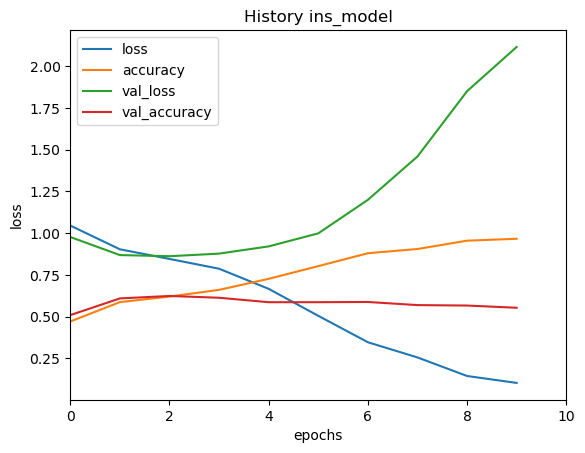

In [8]:
pd.DataFrame(history_1.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))

Epoch 1/10
71/71 [==============================] - 72s 1s/step - loss: 2.0239 - accuracy: 0.3809 - val_loss: 1.0139 - val_accuracy: 0.4987
Epoch 2/10
71/71 [==============================] - 70s 989ms/step - loss: 0.9611 - accuracy: 0.5471 - val_loss: 0.9646 - val_accuracy: 0.5467
Epoch 3/10
71/71 [==============================] - 70s 980ms/step - loss: 0.8811 - accuracy: 0.6027 - val_loss: 0.9828 - val_accuracy: 0.5347
Epoch 4/10
71/71 [==============================] - 72s 1s/step - loss: 0.5883 - accuracy: 0.7604 - val_loss: 1.0989 - val_accuracy: 0.5720


<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

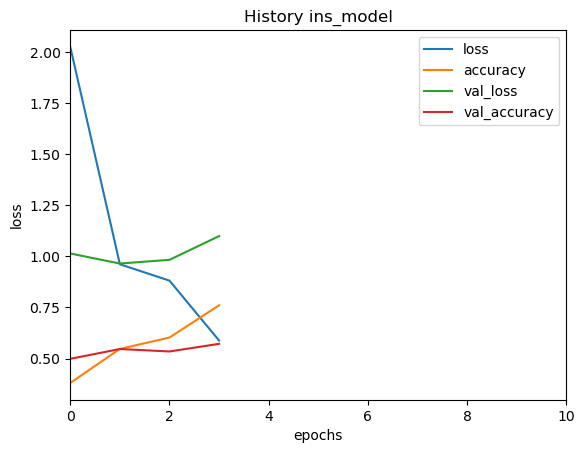

In [9]:
model_new_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the new model
model_new_2.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                  metrics=['accuracy'])

# Fit the new model
history_new = model_new_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=2,
                            restore_best_weights=True
                        )
                    ])




pd.DataFrame(history_new.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))

Epoch 1/10
71/71 [==============================] - 57s 766ms/step - loss: 0.3156 - accuracy: 0.9182 - val_loss: 0.0942 - val_accuracy: 0.9787
Epoch 2/10
71/71 [==============================] - 53s 744ms/step - loss: 0.1053 - accuracy: 0.9747 - val_loss: 0.0678 - val_accuracy: 0.9813
Epoch 3/10
71/71 [==============================] - 52s 740ms/step - loss: 0.0776 - accuracy: 0.9809 - val_loss: 0.0584 - val_accuracy: 0.9813
Epoch 4/10
71/71 [==============================] - 53s 741ms/step - loss: 0.0621 - accuracy: 0.9867 - val_loss: 0.0538 - val_accuracy: 0.9813
Epoch 5/10
71/71 [==============================] - 53s 742ms/step - loss: 0.0519 - accuracy: 0.9902 - val_loss: 0.0524 - val_accuracy: 0.9827
Epoch 6/10
71/71 [==============================] - 53s 741ms/step - loss: 0.0442 - accuracy: 0.9924 - val_loss: 0.0508 - val_accuracy: 0.9827
Epoch 7/10
71/71 [==============================] - 52s 739ms/step - loss: 0.0389 - accuracy: 0.9929 - val_loss: 0.0510 - val_accuracy: 0.9813

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

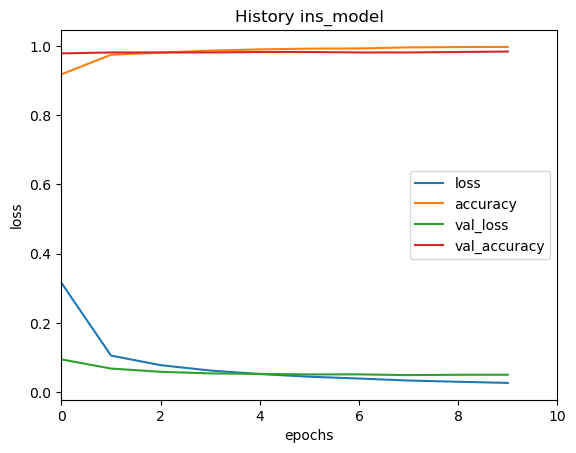

In [10]:
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Шлях до завантаженого модулю EfficientNet
module_url = "https://tfhub.dev/google/efficientnet/b0/feature-vector/1" # Змініть за потребою

# Завантаження моделі EfficientNet
feature_extractor = hub.KerasLayer(module_url, input_shape=(224, 224, 3))

# Замороження параметрів
feature_extractor.trainable = False

# Створення моделі
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(3, activation='softmax')  # 3 класи для класифікації
])

# Компіляція моделі
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Тренування моделі
history_g = model.fit(
    train_data,
    epochs=10,
    validation_data=valid_data
)

pd.DataFrame(history_g.history).plot(xlabel="epochs",
ylabel="loss",title="History ins_model", xlim=(0,10))